In [106]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [39]:
titanic = pd.read_csv(os.path.normpath(os.getcwd() + os.sep + os.pardir) + '/data/titanic-train.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [38]:
titanic.describe()
titanic.describe(include=['O'])

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

In [112]:
titanic.isnull().sum().sort_values(ascending=False)

print("Data Shape: There are {:,.0f} rows and {:,.0f} columns.\nMissing values = {}, Duplicates = {}.\n".
      format(titanic.shape[0], titanic.shape[1],titanic.isna().sum().sum(), titanic.duplicated().sum()))



Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Data Shape: There are 891 rows and 12 columns.
Missing values = 866, Duplicates = 0.



<Figure size 3000x1500 with 0 Axes>

Text(0.5, 1.0, 'Missing Data Heatmap')

<Axes: title={'center': 'Missing Data Heatmap'}>

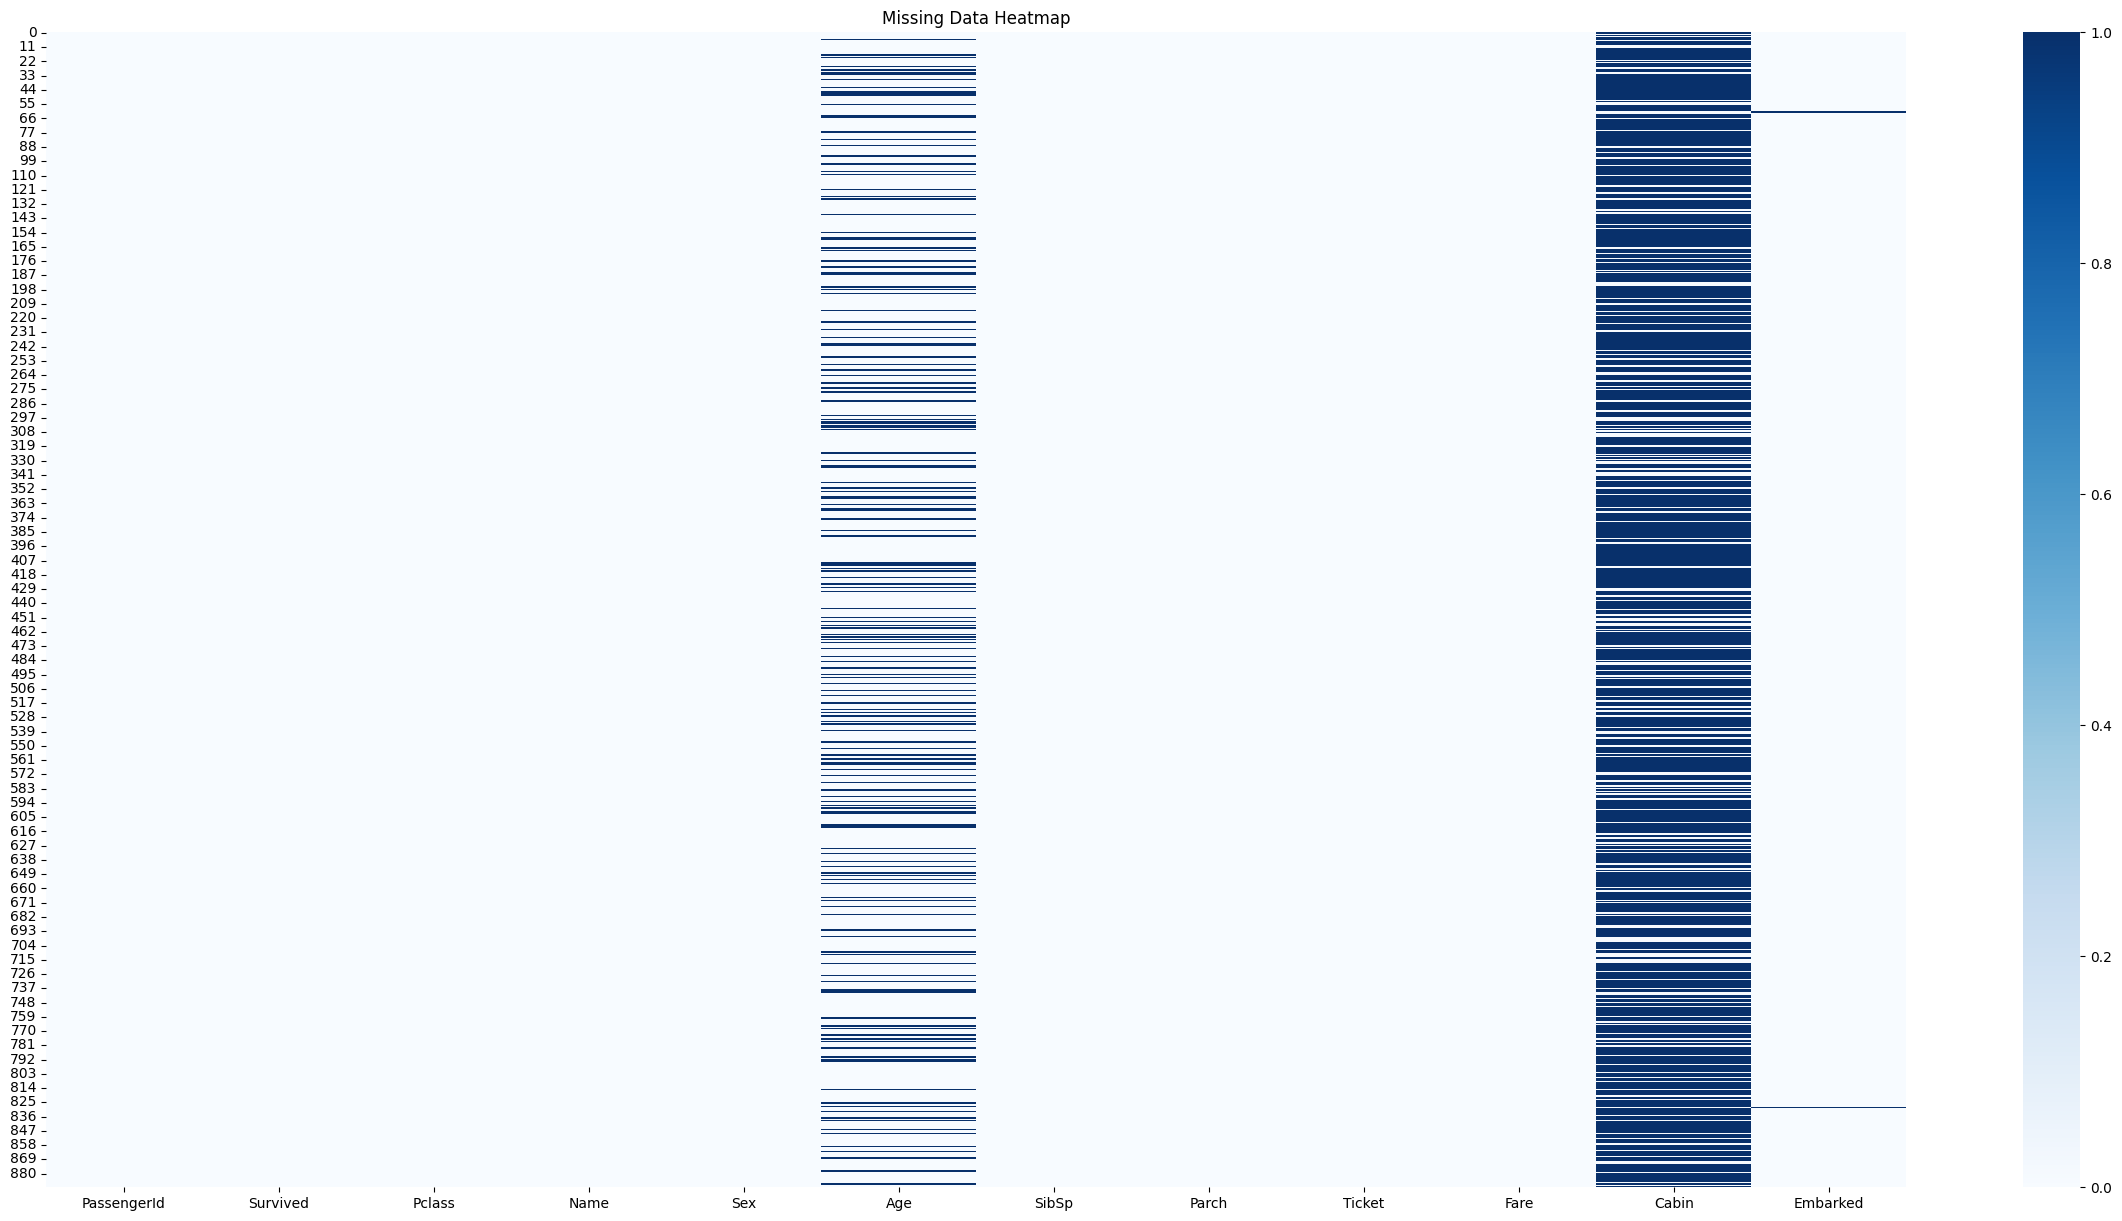

In [107]:
# Visualize missing data using a heatmap
plt.figure(figsize=(30,15))
plt.title("Missing Data Heatmap")
sns.heatmap(titanic.isnull(), cmap="Blues")
plt.show()

<Axes: >

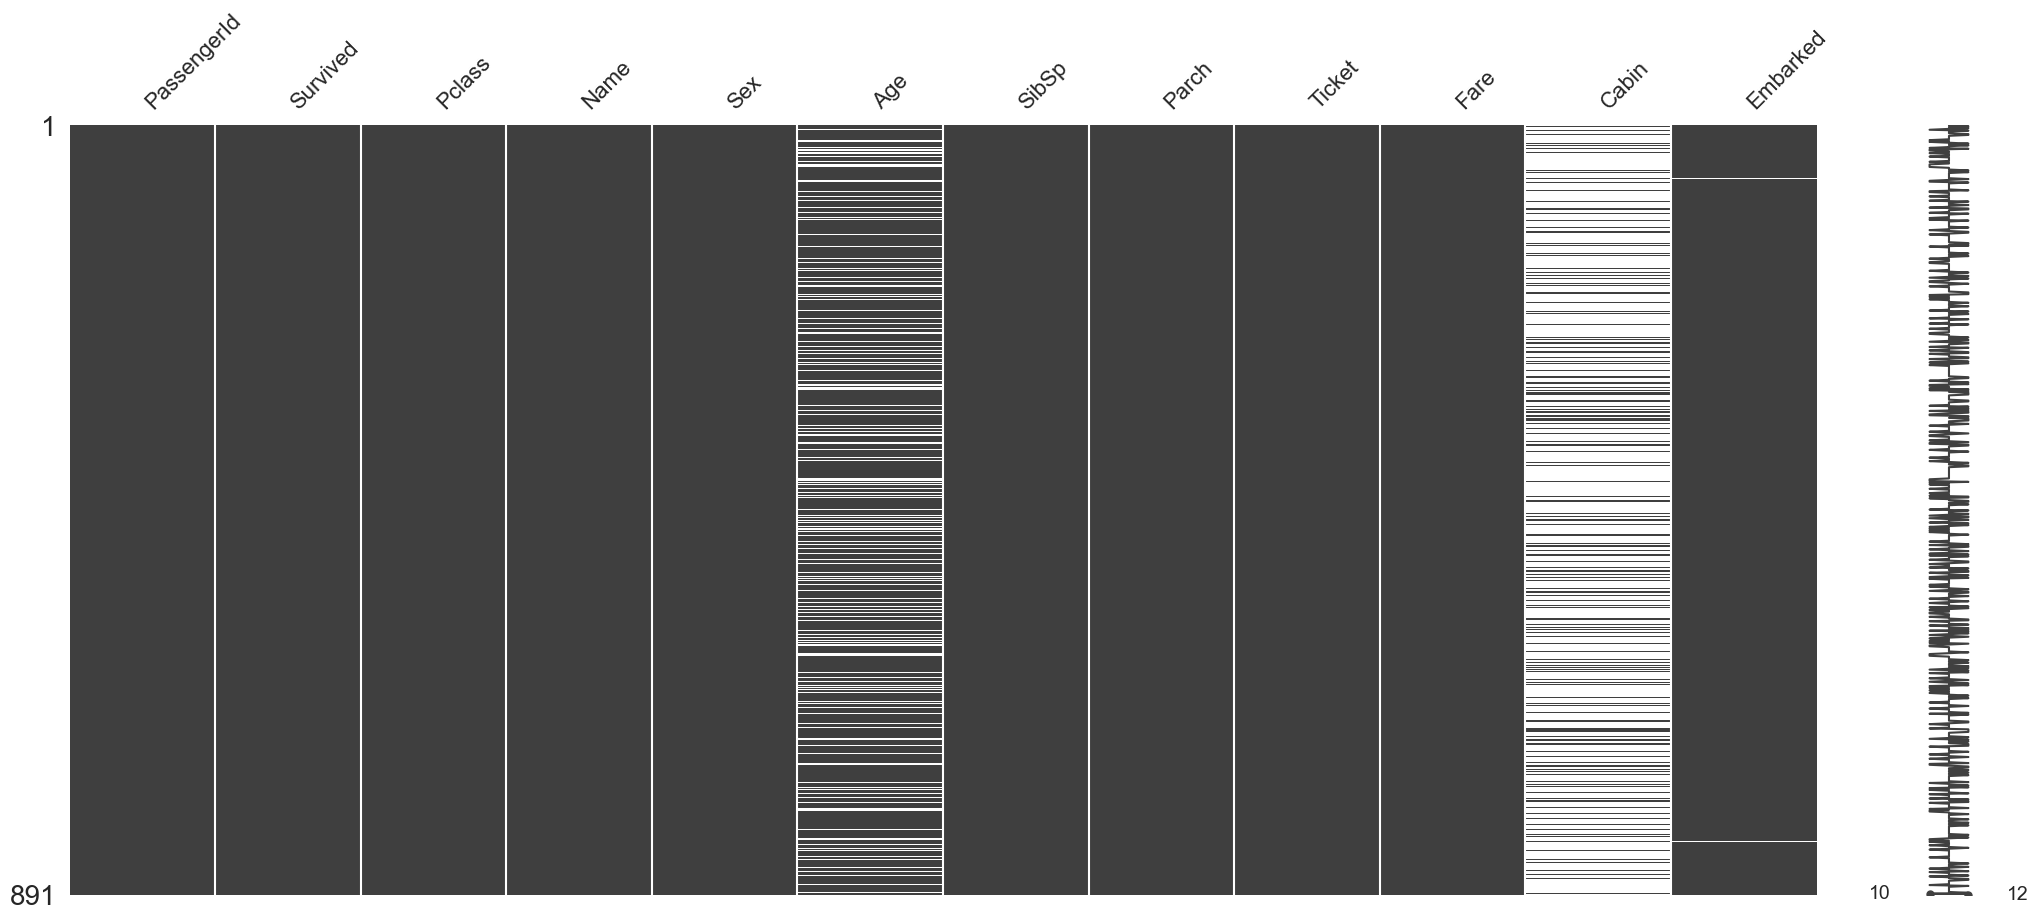

In [118]:
import missingno as msno
msno.matrix(titanic)

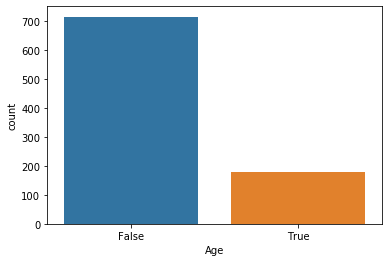

In [15]:
sns.countplot(titanic['Age'].isnull())

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

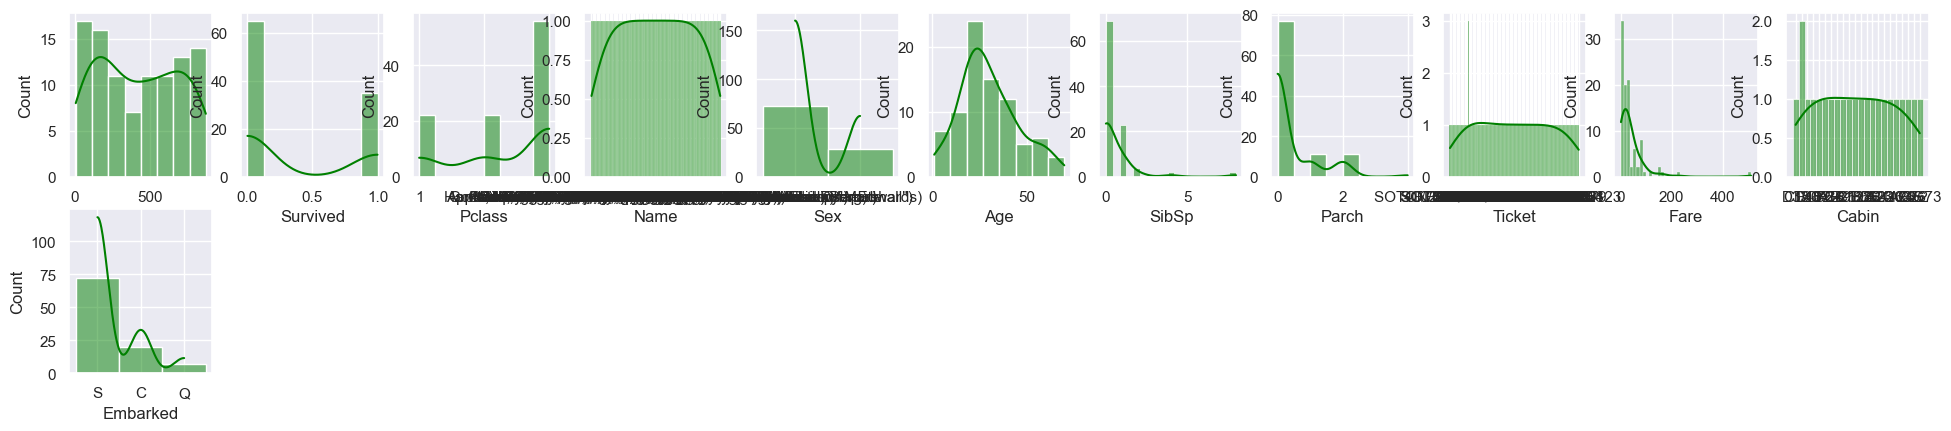

In [110]:
sns.set(rc={'figure.figsize':(24,20)})
for i, column in enumerate(list(titanic.columns), 1):
    plt.subplot(8,11,i)
    p=sns.histplot(x=column,data=titanic.sample(100),stat='count',kde=True,color='green')

In [166]:
n = titanic['Cabin'].nunique()
print("Number of Unique categories:", n)
missing_per = (titanic['Cabin'].isnull().sum()/ titanic['Cabin'].size) * 100
print('Missing percentage: %.2f'% missing_per)

Number of Unique categories: 147
Missing percentage: 77.10


In [4]:
#Deletion - Columns with NAN
df = titanic.copy()
df = df.dropna(axis=1)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [144]:
#Deletion - Rows with NAN
dfr = titanic.copy()
dfr.dropna(inplace=True)
dfr.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [145]:
print("After Column removal:", df.shape)
print("After Rows removal:", dfr.shape)

After Column removal: (891, 9)
After Rows removal: (183, 12)


In [44]:
#Mean imputation
dfm = titanic.copy()
dfm['Age'] = dfm['Age'].replace(np.NaN, dfm['Age'].mean())
dfm['Age'].mean()

# or
from sklearn.impute import SimpleImputer
dfmean = titanic.copy()
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_fit = imp.fit(np.array(dfmean['Age']).reshape(-1,1))
dfmean['Age'] = imp_fit.transform(np.array(dfmean['Age']).reshape(-1,1))
dfmean['Age'].mean()

29.69911764705882

29.69911764705882

In [62]:
#Median imputation
from sklearn.impute import SimpleImputer
dfmed = titanic.copy()
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp = imp.fit(np.array(dfmed['Age']).reshape(-1,1))
dfmed['Age'] = imp.transform(np.array(dfmed['Age']).reshape(-1,1))
dfmed['Age'].isna().sum()

0

In [72]:
#Categorical - Mode imputation
dfmode = titanic.copy()
embarked_na = dfmode[dfmode['Embarked'].isna()]
embarked_na

dfmode['Embarked'] = dfmode['Embarked'].replace(np.NaN, dfmode['Embarked'].mode()[0])
dfmode['Embarked'].isnull().sum()

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

0

In [23]:
#Categorical - unique category
dfm['Cabin'] = dfm['Cabin'].fillna('ZZZ')
dfm['Cabin'].unique()

array(['ZZZ', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64

In [197]:
# Hot deck encoding
dfhot = titanic.copy()
for i in range(dfhot.shape[1]):
    missing_mask = pd.isna(dfhot.iloc[:, i])
    if np.any(missing_mask):
        col_name = dfhot.iloc[:, i].name
        non_missing_vals = dfhot.loc[~missing_mask, col_name]
        replace_with = np.random.choice(non_missing_vals)
        dfhot.loc[missing_mask, col_name] = replace_with

dfhot.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [121]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                    [3, 4, np.nan, 1],
                    [np.nan, np.nan, 9, 5],
                    [np.nan, 3, np.nan, 4]],
                   columns=list('ABCD'))
df

A    B    C  D
0  NaN  2.0  NaN  0
1  3.0  4.0  NaN  1
2  NaN  NaN  9.0  5
3  NaN  3.0  NaN  4

In [127]:
#LOCF - last observation carried forward
df1 = df.copy()
df1.fillna(method='ffill', inplace=True)
df1

C:\Users\EdwinVivekN\AppData\Local\Temp\ipykernel_6800\146328827.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1.fillna(method='ffill', inplace=True)


A    B    C  D
0  NaN  2.0  NaN  0
1  3.0  4.0  NaN  1
2  3.0  4.0  9.0  5
3  3.0  3.0  9.0  4

In [131]:
# Replace with Maximum Value/ Minimum value
df2 = df.copy()
df2['A'] = df2['A'].fillna(df2['A'].max())

# Replace with Minimum Value
df2['B'] = df2['B'].fillna(df2['B'].min())
df2

A    B    C  D
0  3.0  2.0  NaN  0
1  3.0  4.0  NaN  1
2  3.0  2.0  9.0  5
3  3.0  3.0  NaN  4

In [294]:
#Interpolate
df.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
df

A    B    C  D
0  NaN  2.0  NaN  0
1  3.0  4.0  NaN  1
2  3.0  3.5  9.0  5
3  3.0  3.0  9.0  4

<h1>KNN Imputation</h1>

In [201]:
from sklearn.impute import KNNImputer
horse = pd.read_csv(os.path.normpath(os.getcwd() + os.sep + os.pardir) + "/data/horse-colic.csv", header=None, na_values='?')
horse

#import requests
#from bs4 import BeautifulSoup
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.names"
#req = requests.get(url)
#for i in req.iter_lines():
#    print(i)

0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0    2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1    1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2    2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3    1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4    2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   
..   ...  ..      ...   ...    ...   ...  ...  ...  ...  ...  ...   ...   ...   
295  1.0   1   533886   NaN  120.0  70.0  4.0  NaN  4.0  2.0  ...  55.0  65.0   
296  2.0   1   527702  37.2   72.0  24.0  3.0  2.0  4.0  2.0  ...  44.0   NaN   
297  1.0   1   529386  37.5   72.0  30.0  4.0  3.0  4.0  1.0  ...  60.0   6.8   
298  1.0   1   530612  36.5  100.0  24.0  3.0  3.0  3.0  1.0  ...  50.0   6.0   
299  1.0   1   534618  37.2   40.0  20.0  NaN  NaN  NaN  NaN  ...  36.0  62.0   

      20   21   22  23     24  25  26  27  
0    NaN  NaN  2.0   2  11300   0   0   2  
1    2.0  2.0  3.0   2   2208   0   0   2  
2    NaN  NaN  1.0   2      0   0   0   1  
3    3.0  5.3  2.0   1   2208   0   0   1  
4    NaN  NaN  2.0   2   4300   0   0   2  
..   ...  ...  ...  ..    ...  ..  ..  ..  
295  NaN  NaN  3.0   2   3205   0   0   2  
296  3.0  3.3  3.0   1   2208   0   0   1  
297  NaN  NaN  2.0   1   3205   0   0   2  
298  3.0  3.4  1.0   1   2208   0   0   1  
299  1.0  1.0  3.0   2   6112   0   0   2  

[300 rows x 28 columns]

In [231]:
horse_X = horse[horse.columns[~horse.columns.isin([23])]]
horse_Y = horse[horse.columns[horse.columns.isin([23])]]
nulldf = horse_X.loc[:, horse_X.isnull().sum() > 0]
nulldf.isnull().sum()

0       1
3      60
4      24
5      58
6      56
7      69
8      47
9      32
10     55
11     44
12     56
13    104
14    106
15    247
16    102
17    118
18     29
19     33
20    165
21    198
22      1
dtype: int64

In [236]:
imputer = KNNImputer()
imputer.fit(nulldf)
x_trans = imputer.transform(nulldf)
pd.DataFrame(x_trans).isnull().sum()

KNNImputer()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64

In [2]:
#Prediction imputation
#regression imputation